## What is a Decision Tree?
A decision tree is a flowchart-like structure used to make decisions or predictions. It consists of nodes representing decisions or tests on attributes, branches representing the outcome of these decisions, and leaf nodes representing final outcomes or predictions. Each internal node corresponds to a test on an attribute, each branch corresponds to the result of the test, and each leaf node corresponds to a class label or a continuous value.

#### Structure of a Decision Tree
- Root Node: Represents the entire dataset and the initial decision to be made.
- Internal Nodes: Represent decisions or tests on attributes. Each internal node has one or more branches.
- Branches: Represent the outcome of a decision or test, leading to another node.
- Leaf Nodes: Represent the final decision or prediction. No further splits occur at these nodes.

#### How Decision Trees Work?
The process of creating a decision tree involves:

- Selecting the Best Attribute: Using a metric like Gini impurity, entropy, or information gain, the best attribute to split the data is selected.
- Splitting the Dataset: The dataset is split into subsets based on the selected attribute.
- Repeating the Process: The process is repeated recursively for each subset, creating a new internal node or leaf node until a stopping criterion is met (e.g., all instances in a node belong to the same class or a predefined depth is reached).



In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint 

In [3]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.drop('id', axis=1, inplace=True) 

In [9]:
px.pie(df, 'diagnosis', color='diagnosis',
       color_discrete_sequence=['#007500','#5CFF5C'],
       title='Data Distribution')

# plt.pie(df['diagnosis'].value_counts(), labels = 
#         df['diagnosis'].value_counts().index, autopct='%1.1f%%')

In [10]:
for column in  df.drop('diagnosis',axis=1).columns[:5]:
    fig = px.box(data_frame=df,x='diagnosis',color='diagnosis',y=column,color_discrete_sequence=['#007500','#5CFF5C'],orientation='v')
    fig.show()  

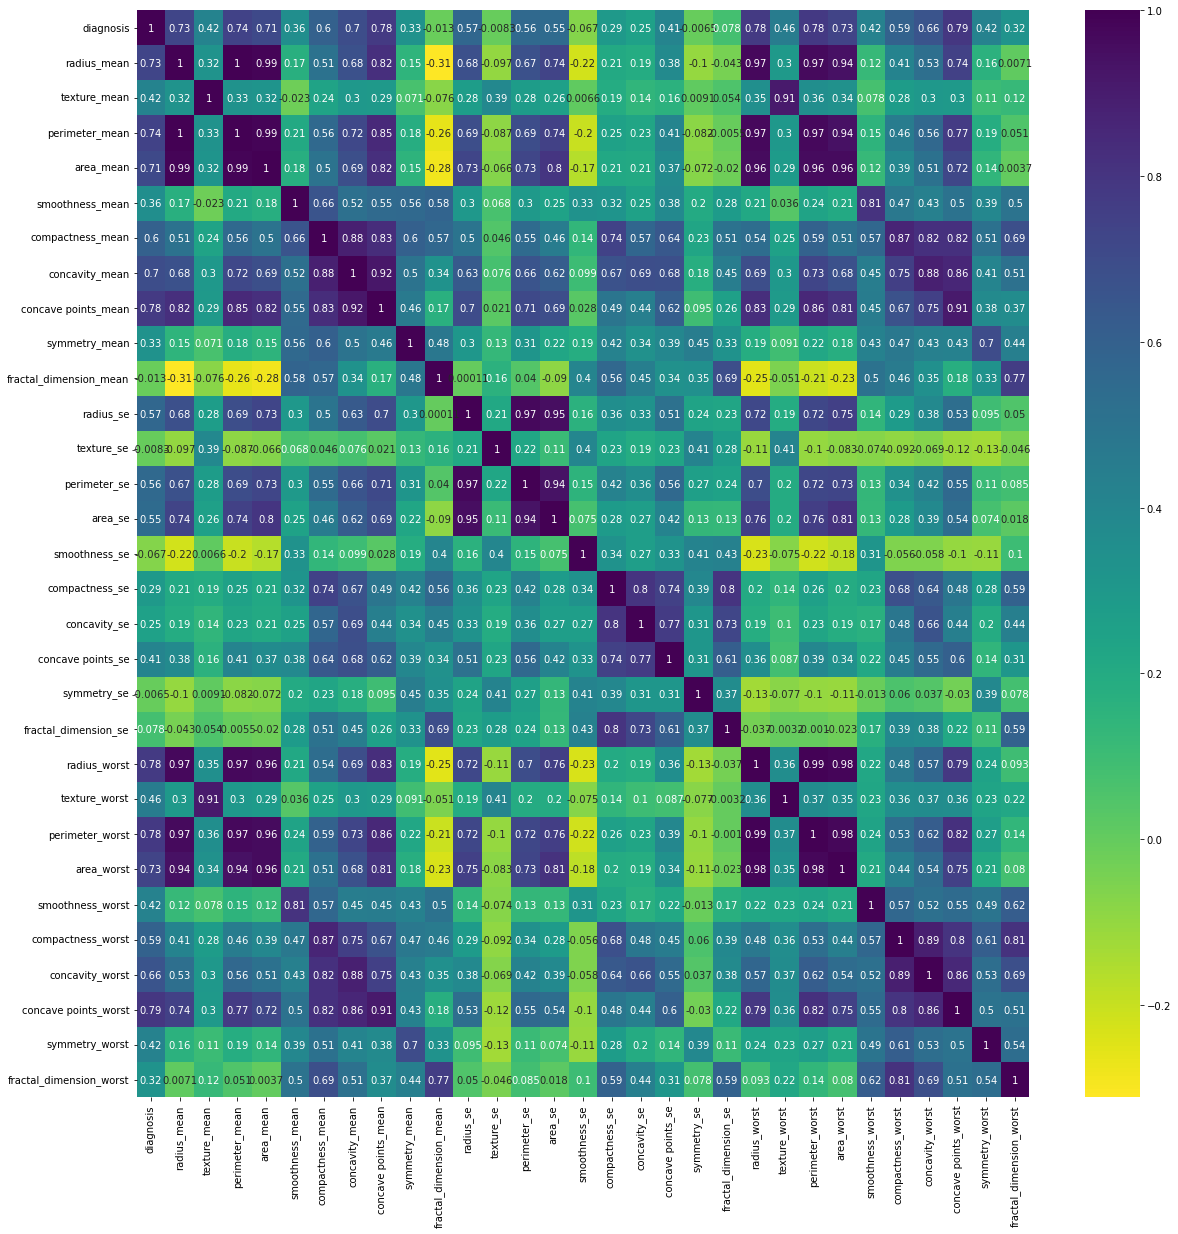

In [11]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='viridis_r',annot=True)
plt.show()

In [15]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis'].values.reshape(-1,1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.2)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Create a decision tree classifier model object.
decision_tree_classifier = DecisionTreeClassifier()

# Train the decision tree classifier model using the training data.
decision_tree_classifier.fit(X_train, y_train)

# Use the trained model to make predictions on the test data.
predictions = decision_tree_classifier.predict(X_test)

# Calculate evaluating metrics
print(f" Model's Accuracy: {accuracy_score(y_test, predictions)}")

 Model's Accuracy: 0.9649122807017544
